In [1]:
import time
import os
import shutil
from collections import namedtuple
import numpy as np
import scipy as sp
from scipy import optimize
import h5py
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d = pickle.load(open('./results/c.p', 'rb'))
c = namedtuple('Const', d.keys())(**d)

h5f = h5py.File('./results/results.hdf5', 'r')
all_trials = h5f['Results'][:]
h5f.close()

print(all_trials.shape)
print(all_trials.nbytes / 1e9, 'GB')

(64, 150, 150, 600)
6.912 GB


In [3]:
# Find populations over time for all trials
pop_all = []
for i in range(c.n_trials):
    pop = []
    Z_history = all_trials[i, :, :, :]
    for j in range(c.n_iterations):
        pop.append(Z_history[:, :, j].sum())
    pop_all.append(pop)
pop_all = np.array(pop_all)

# Mean and Std over over time
pop_mean = pop_all.mean(axis=0)
pop_std = pop_all.std(axis=0)

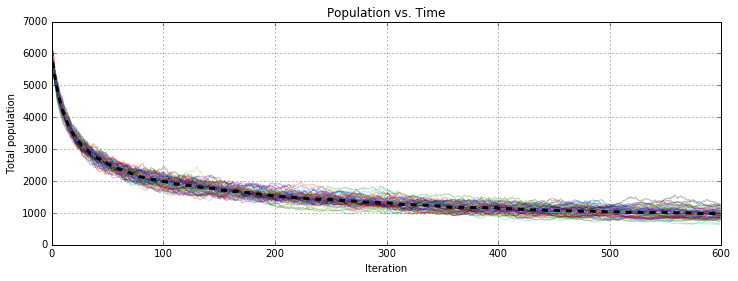

In [4]:
fig, ax = plt.subplots(1, figsize=(12, 4))

xpts = np.arange(c.n_iterations)
for i in range(c.n_trials):
    ax.plot(xpts, pop_all[i], alpha=0.3)
    
ax.plot(xpts, pop_mean, 'k--', lw=3)
        
ax.set_title('Population vs. Time')
ax.set_xlabel('Iteration')
ax.set_ylabel('Total population')
ax.grid()

plt.show()
plt.close(fig)